<a href="https://colab.research.google.com/github/Leelamadhuri-26/Artificial-intilligence-and-machine-learning/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!unzip '/content/Animal_Dataset.zip'

Archive:  /content/Animal_Dataset.zip
   creating: dataset/
   creating: dataset/Testing/
   creating: dataset/Testing/bears/
  inflating: dataset/Testing/bears/k4 (100).jpeg  
  inflating: dataset/Testing/bears/k4 (100).jpg  
  inflating: dataset/Testing/bears/k4 (101).jpeg  
  inflating: dataset/Testing/bears/k4 (101).jpg  
  inflating: dataset/Testing/bears/k4 (102).jpeg  
  inflating: dataset/Testing/bears/k4 (102).jpg  
  inflating: dataset/Testing/bears/k4 (103).jpeg  
  inflating: dataset/Testing/bears/k4 (104).jpeg  
  inflating: dataset/Testing/bears/k4 (105).jpeg  
  inflating: dataset/Testing/bears/k4 (106).jpeg  
  inflating: dataset/Testing/bears/k4 (107).jpeg  
  inflating: dataset/Testing/bears/k4 (108).jpeg  
  inflating: dataset/Testing/bears/k4 (109).jpeg  
  inflating: dataset/Testing/bears/k4 (110).jpeg  
  inflating: dataset/Testing/bears/k4 (71).jpg  
  inflating: dataset/Testing/bears/k4 (72).jpeg  
  inflating: dataset/Testing/bears/k4 (72).jpg  
  inflating: da

In [ ]:
# Data Augmentation

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip = True,shear_range = 0.2)
test_gen = ImageDataGenerator(rescale=(1./255))
#---> (0 to 255) convert to (0 to 1)

In [9]:
train = train_gen.flow_from_directory('/content/dataset/Training' ,target_size = (120,120),class_mode ='categorical' , batch_size=8)
test = test_gen.flow_from_directory( '/content/dataset/Testing',target_size =(120, 120),class_mode ='categorical',batch_size=8)


Found 1238 images belonging to 4 classes.
Found 326 images belonging to 4 classes.


In [10]:
train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

CNN

In [18]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [19]:
model = Sequential()
model.add(Convolution2D(20,(3,3),activation = 'relu',input_shape = (120,120,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(45,activation = 'relu'))
model.add(Dense(4,activation = 'softmax'))

In [20]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [21]:
model.fit(train,batch_size = 8,validation_data = test,epochs = 10)

Epoch 1/10
155/155 [==============================] - 27s 163ms/step - loss: 1.2743 - accuracy: 0.5089 - val_loss: 0.6593 - val_accuracy: 0.7883
Epoch 2/10
155/155 [==============================] - 25s 158ms/step - loss: 0.6597 - accuracy: 0.7601 - val_loss: 0.3267 - val_accuracy: 0.9356
Epoch 3/10
155/155 [==============================] - 25s 160ms/step - loss: 0.4096 - accuracy: 0.8667 - val_loss: 0.2980 - val_accuracy: 0.9141
Epoch 4/10
155/155 [==============================] - 24s 158ms/step - loss: 0.2569 - accuracy: 0.9273 - val_loss: 0.1171 - val_accuracy: 0.9785
Epoch 5/10
155/155 [==============================] - 26s 164ms/step - loss: 0.1765 - accuracy: 0.9523 - val_loss: 0.1016 - val_accuracy: 0.9724
Epoch 6/10
155/155 [==============================] - 24s 158ms/step - loss: 0.0996 - accuracy: 0.9758 - val_loss: 0.0567 - val_accuracy: 0.9969
Epoch 7/10
155/155 [==============================] - 24s 154ms/step - loss: 0.0738 - accuracy: 0.9822 - val_loss: 0.0452 - val_ac

In [ ]:
model.save('/content/animal.h5')

Testing

In [25]:
import numpy as np
from tensorflow.keras.preprocessing import image

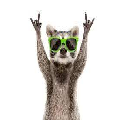

In [26]:
img = image.load_img('/content/download.jpeg',target_size = (120,120))
img

In [27]:
img = image.img_to_array(img)
img

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [28]:
img = np.expand_dims(img,axis = 0)
img

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

Final output

In [33]:
b = np.argmax(model.predict(img))
if(b==3):
  b = 'a racoon'
else:
  b = 'not a racoon'
print("Our model says it is ",b)

1/1 [==============================] - 0s 28ms/step
Our model says it is  a racoon
